In [60]:
#import the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')

from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [61]:
df=pd.read_csv("/content/reddit_anxiety_labelled - reddit_anxiety.csv")
df.head()

,Unnamed: 0,comments,category
0,0,I have a conversation with anyone and I instan...,1.0
1,1,I lost a great job at the beginning of the pan...,1.0
2,2,Well.. I’m embarrassed as can be. Panic attack...,1.0
3,3,And when I say bitch I mean it in the sense th...,0.0
4,4,Work just amplifies my social anxiety to the p...,1.0


In [62]:
df.drop("Unnamed: 0",inplace=True,axis=1)
df.head()

,comments,category
0,I have a conversation with anyone and I instan...,1.0
1,I lost a great job at the beginning of the pan...,1.0
2,Well.. I’m embarrassed as can be. Panic attack...,1.0
3,And when I say bitch I mean it in the sense th...,0.0
4,Work just amplifies my social anxiety to the p...,1.0


In [63]:
df.shape

(579, 2)

In [64]:
print(f"Number of nan values:\n\n{df.isna().sum()}\n\n")
print(f"Duplicated Values: \n\n {df.duplicated(subset=['comments'],keep='first').value_counts()}")

Number of nan values:

comments      0
category    381
dtype: int64


Duplicated Values: 

 False    573
True       6
dtype: int64


**Prediction is to be made for those nan values.**

In [65]:
#dropping the duplicated and  nan rows
df.drop_duplicates(subset=["comments"],inplace=True)
#checking
df.duplicated(subset=['comments'],keep='first').value_counts()

False    573
dtype: int64

Count of records in different categories:

 1.0    132
0.0     66
Name: category, dtype: int64




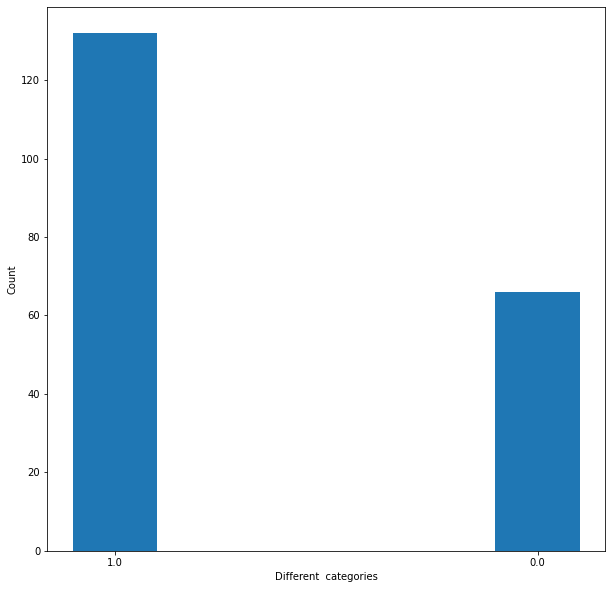

In [66]:
print(f"Count of records in different categories:\n\n {df['category'].value_counts()}\n\n")

#seeing the dataset is balanced or not
y_values=[value for value in df["category"].value_counts()]
x_label=[str(value) for value in df["category"].value_counts().index]
x_values=[i for i in range(2)]
#x_label.insert(0,0)
plt.figure(figsize=(10,10))
plt.bar(x_values,y_values,0.2)
plt.xticks(ticks=[0,1],labels=x_label)
plt.xlabel("Different  categories")
plt.ylabel("Count")
plt.show()

In [67]:
def clean_data(frame,column):
  frame[column]=frame[column].apply(lambda x: x.lower())
  frame[column]=frame[column].apply(lambda x: re.sub("[^a-zA-Z0-9\s]","",x))
  frame[column].apply(lambda x: " ".join([word for word in x.split() if word not in STOPWORDS]))
  return 0


clean_data(df,'comments')

0

In [68]:
df.head()

,comments,category
0,i have a conversation with anyone and i instan...,1.0
1,i lost a great job at the beginning of the pan...,1.0
2,well im embarrassed as can be panic attack got...,1.0
3,and when i say bitch i mean it in the sense th...,0.0
4,work just amplifies my social anxiety to the p...,1.0


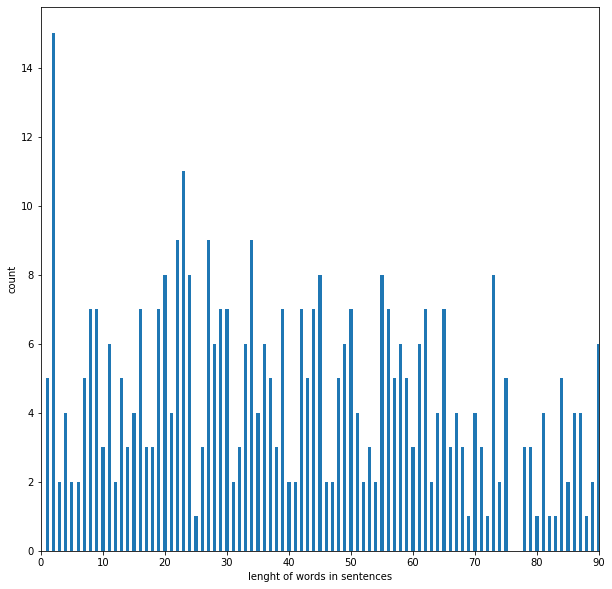

In [69]:
plt.figure(figsize=(10,10))
word_count=df['comments'].apply(lambda x:len(x.split()))
y=word_count.value_counts()
x=y.index
plt.bar(x,y,width=0.5)
plt.xlim(0,90)
plt.xlabel('lenght of words in sentences')
plt.ylabel('count')
plt.show()

# **Preparing data for model fitting.**

In [70]:
len(df[df["category"]>=0])

198

In [71]:
#training data
train_data=df.iloc[:198,:]
train_data.dropna(inplace=True)
train_data.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,comments,category
193,i try to go early in the morning but there is ...,0.0
194,im looking to go see a psychiatrist and im see...,0.0
195,i talked about having heart palpitations every...,1.0
196,hi im 18 years old i have not been diagnosed w...,1.0
197,i started zoloft 8 days ago i was first prescr...,0.0


In [72]:
x=train_data["comments"]
y=train_data["category"]

In [73]:
#prediction data
pred=df.iloc[198:,:]
x_pred=pred["comments"]
display(x_pred)

198    i dont know much about other anxietys what are...
199    anyone use contrave and have massive anxiety a...
200    ive always had terribly anxiety but ive never ...
201    it feels like i cant really get tired anymore ...
202    im always creating problems for myself and its...
                             ...                        
574    i had a health anxiety issue for almost a week...
575    anyone else have constant anxiety symptoms but...
576    i live in a busy part of my city and there are...
577    today i did something kind of stupid on the ro...
578    i really need to know if anyone relates to thi...
Name: comments, Length: 375, dtype: object

In [74]:
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True,
                             decode_error="replace")
train_vectors = vectorizer.fit_transform(x)
test_vectors = vectorizer.transform(x_pred)

In [75]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(train_vectors,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# **Predicting on more than 300 records**

In [76]:
prediction_linear = classifier_linear.predict(test_vectors)

In [77]:
prediction_linear

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 1.